In [1]:
import numpy as np
import pandas as pd
import re
import random
from collections import defaultdict, Counter
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def limpar_texto(texto):
    texto = texto.lower()  # Converte tudo para minúsculas
    texto = re.sub(r'[^\w\s]', ' ', texto)  # Remove pontuações
    texto = re.sub(r'\d+', ' ', texto)      # Remove números
    texto = re.sub(r'\s+', ' ', texto)      # Substitui múltiplos espaços por um só
    return texto.strip()

In [3]:
texto_demo = """
A modelagem de linguagem natural é uma das áreas mais importantes dentro do campo do processamento de linguagem natural (PLN). Ela consiste em construir modelos computacionais capazes de entender, gerar ou prever sequências linguísticas em linguagem humana. Em outras palavras, é a capacidade de um sistema de prever qual será a próxima palavra em uma frase ou de gerar textos inteiros de maneira coerente e gramaticalmente correta.
Essa técnica é utilizada em diversos contextos do nosso cotidiano, muitas vezes sem que percebamos. Ferramentas de correção ortográfica, sugestões de palavras em aplicativos de mensagem, sistemas de tradução automática e assistentes virtuais como Alexa, Google Assistant e Siri fazem uso intenso de modelos de linguagem. Mesmo nas redes sociais, algoritmos que sugerem comentários automáticos ou classificam conteúdos ofensivos se beneficiam dessas tecnologias.
O que são Modelos de Linguagem
Modelos de linguagem são sistemas capazes de atribuir probabilidades às sequências de palavras. Por exemplo, em uma frase como “Eu gosto de”, o modelo pode prever que as próximas palavras mais prováveis sejam “chocolate”, “viajar”, ou “estudar”, com base em padrões aprendidos a partir de textos analisados previamente. A qualidade de um modelo de linguagem está diretamente relacionada à sua capacidade de capturar essas regularidades e usá-las para prever ou gerar novas sequências de forma natural.
Existem diferentes abordagens para a construção desses modelos. Entre os métodos mais tradicionais estão os chamados modelos baseados em N-grams, enquanto os métodos mais recentes incluem os modelos neurais, que utilizam redes neurais profundas e técnicas de aprendizado de máquina avançadas para capturar nuances mais complexas da linguagem.
Model
Um modelo N-gram é uma abordagem probabilística simples e eficiente para modelar linguagem natural. Ele se baseia na suposição de que a ocorrência de uma palavra depende apenas das N-1 palavras anteriores. Por exemplo, em um modelo 2-grama (bigram), a palavra atual é prevista com base apenas na palavra imediatamente anterior. Em um modelo 3-grama (trigrama), a previsão se baseia nas duas palavras anteriores, e assim por diante.
A principal vantagem dos modelos N-gram é sua simplicidade e facilidade de implementação. Eles são rápidos, interpretáveis e podem ser treinados com relativamente poucos dados. Além disso, são adequados para tarefas em que o desempenho em tempo real é importante ou onde os recursos computacionais são limitados.
No entanto, os modelos N-gram também têm limitações. Como consideram apenas uma janela fixa de palavras anteriores, eles têm dificuldade para lidar com dependências de longo alcance – um aspecto comum na linguagem natural. Além disso, a necessidade de armazenar contagens para todas as possíveis combinações de N palavras leva a problemas de escassez de dados e alta dimensionalidade, especialmente para valores de N maiores.
Para contornar esses desafios, técnicas como suavização (smoothing) são empregadas, permitindo ao modelo lidar melhor com combinações de palavras raras ou ausentes no treinamento. Ainda assim, à medida que cresce a complexidade da linguagem a ser modelada, torna-se necessário adotar abordagens mais sofisticadas.
Com o avanço da computação e a disponibilidade de grandes volumes de dados textuais, surgiram abordagens mais sofisticadas para modelagem de linguagem, baseadas em redes neurais artificiais. Esses modelos vão além da limitação dos N-grams ao considerar contextos mais amplos e ao aprender representações distribuídas da linguagem — ou seja, vetores densos que capturam significados semânticos e sintáticos das palavras.
Dentre os primeiros modelos neurais de linguagem, destacam-se as Redes Neurais Recorrentes (RNNs). Essas redes foram projetadas especificamente para trabalhar com dados sequenciais, como texto e fala, onde a ordem dos elementos é fundamental. Diferente das redes neurais tradicionais, que processam entradas de forma independente, as RNNs mantêm um estado interno que é atualizado a cada novo elemento da sequência, permitindo que informações passadas influenciem as decisões futuras.
Como Funcionam as
Em um modelo de linguagem com RNN, cada palavra de uma sequência é representada como um vetor (normalmente através de técnicas como word embeddings, por exemplo, Word2Vec ou GloVe). Esses vetores são alimentados sequencialmente na rede, que mantém um vetor de estado oculto (hidden state) que armazena informações do passado. A saída em cada passo é uma distribuição de probabilidade sobre o vocabulário, indicando qual deve ser a próxima palavra.
Isso permite que a rede aprenda a associar contextos mais complexos às palavras seguintes. Por exemplo, em uma frase como "O cachorro correu para", a rede pode aprender que “rua” ou “parque” são mais prováveis do que palavras como “jantar” ou “telefone”, mesmo que a distância entre as palavras relacionadas seja maior do que a janela de um N-gram tradicional.
LSTMs e GRUs: Superando as Limitações das R
Apesar de seu potencial, as RNNs tradicionais sofrem com dois grandes problemas: desvanecimento do gradiente (vanishing gradient) e explosão do gradiente (exploding gradient). Isso dificulta o treinamento em sequências longas, já que as redes têm dificuldade em aprender dependências de longo prazo.
Para lidar com esse desafio, foram propostas arquiteturas especializadas como as Long Short-Term Memory networks (LSTM) e as Gated Recurrent Units (GRU). Essas variantes introduzem mecanismos de controle internos (portas ou gates) que regulam o fluxo de informações através do tempo, permitindo que a rede “decida” o que lembrar e o que esquecer. Com isso, elas conseguem manter memória por períodos maiores e aprender relações de longo prazo com mais eficácia.
Aplicações de Modelos Neurais em PLN
Modelos neurais de linguagem já são amplamente utilizados em aplicações do dia a dia. Alguns exemplos incluem:
Corretores automáticos inteligentes, que sugerem a próxima palavra com base no estilo pessoal do usuário.
Tradução automática neural, como o Google Tradutor, que utiliza modelos como o Transformer para traduzir frases inteiras com fluidez e coerência.
Geradores de texto, que criam resumos, artigos ou mesmo histórias com base em instruções ou entradas iniciais.
Classificadores de texto, que determinam o sentimento de uma postagem em redes sociais ou filtram spam em e-mails.
Mesmo em tarefas complexas como atendimento ao cliente automatizado ou sistemas de busca, os modelos de linguagem desempenham papel central, entendendo o que o usuário deseja e oferecendo respostas contextualizadas.
Limitações das RN
Embora as RNNs e suas variantes como LSTMs tenham representado um grande avanço, elas ainda possuem limitações significativas:
Processamento sequencial: As RNNs processam texto palavra por palavra, o que dificulta o paralelismo no treinamento, tornando-o mais lento.
Dificuldade em capturar dependências bidirecionais: Muitas vezes, entender uma palavra requer conhecimento do que vem antes e depois dela. Isso levou ao desenvolvimento de arquiteturas bidirecionais (BiRNN, BiLSTM), mas que ainda enfrentam limitações.
Curto alcance efetivo de memória: Apesar das melhorias das LSTMs, elas ainda têm dificuldade em lidar com sequências extremamente longas, como capítulos inteiros de livros ou artigos extensos.
Esses desafios abriram caminho para uma nova revolução na modelagem de linguagem: os Transformers — um modelo baseado inteiramente em atenção, que superou muitas dessas limitações e tornou possível a criação de sistemas altamente performáticos como o GPT, BERT e outros.
"""

In [4]:
texto_tratado = limpar_texto(texto_demo)
print(texto_tratado)

a modelagem de linguagem natural é uma das áreas mais importantes dentro do campo do processamento de linguagem natural pln ela consiste em construir modelos computacionais capazes de entender gerar ou prever sequências linguísticas em linguagem humana em outras palavras é a capacidade de um sistema de prever qual será a próxima palavra em uma frase ou de gerar textos inteiros de maneira coerente e gramaticalmente correta essa técnica é utilizada em diversos contextos do nosso cotidiano muitas vezes sem que percebamos ferramentas de correção ortográfica sugestões de palavras em aplicativos de mensagem sistemas de tradução automática e assistentes virtuais como alexa google assistant e siri fazem uso intenso de modelos de linguagem mesmo nas redes sociais algoritmos que sugerem comentários automáticos ou classificam conteúdos ofensivos se beneficiam dessas tecnologias o que são modelos de linguagem modelos de linguagem são sistemas capazes de atribuir probabilidades às sequências de pal

In [5]:
palavras = limpar_texto(texto_demo).split()
print("Quantidade de palavras:", len(palavras))
print("Exemplo:", palavras[:10])

Quantidade de palavras: 1142
Exemplo: ['a', 'modelagem', 'de', 'linguagem', 'natural', 'é', 'uma', 'das', 'áreas', 'mais']


In [6]:
class ModeloNGram:
    def __init__(self, n):
        self.n = n
        self.contagens = defaultdict(Counter)
        self.modelo = {}

    def treinar(self, palavras):
        for i in range(len(palavras) - self.n + 1):
            contexto = tuple(palavras[i:i+self.n-1])
            alvo = palavras[i+self.n-1]
            self.contagens[contexto][alvo] += 1

        for contexto, alvos in self.contagens.items():
            total = sum(alvos.values())
            self.modelo[contexto] = {
                palavra: freq / total for palavra, freq in alvos.items()
            }

    def proxima_palavra(self, contexto):
        contexto = tuple(contexto[-(self.n-1):]) if self.n > 1 else ()
        if contexto in self.modelo:
            palavras = list(self.modelo[contexto].keys())
            probs = list(self.modelo[contexto].values())
            return np.random.choice(palavras, p=probs)
        return None

    def gerar_texto(self, contexto_inicial, quantidade=15):
        if isinstance(contexto_inicial, str):
            contexto_inicial = contexto_inicial.split()
        if len(contexto_inicial) < self.n - 1:
            raise ValueError(f"Contexto inicial deve ter pelo menos {self.n - 1} palavras")
        texto = list(contexto_inicial)
        for _ in range(quantidade):
            prox = self.proxima_palavra(texto)
            if not prox:
                break
            texto.append(prox)
        return ' '.join(texto)

In [7]:
modelo_1gram = ModeloNGram(1)
modelo_2gram = ModeloNGram(2)
modelo_7gram = ModeloNGram(7)

modelo_1gram.treinar(palavras)
modelo_2gram.treinar(palavras)
modelo_7gram.treinar(palavras)


In [8]:
def calcular_perplexidade(modelo, texto_teste):
    tokens = limpar_texto(texto_teste).split()
    log_prob = 0
    total = 0
    for i in range(modelo.n - 1, len(tokens)):
        contexto = tuple(tokens[i - modelo.n + 1:i]) if modelo.n > 1 else ()
        alvo = tokens[i]
        prob = modelo.modelo.get(contexto, {}).get(alvo, 1e-10)
        log_prob += np.log2(prob)
        total += 1
    return 2 ** (-log_prob / total) if total > 0 else float('inf')

texto_teste = """
Os modelos de linguagem são fundamentais para diversas aplicações.
A modelagem estatística ajuda a entender padrões em textos.
"""

print("Perplexidade:")
print("Unigram:", calcular_perplexidade(modelo_1gram, texto_teste))
print("Bigram:", calcular_perplexidade(modelo_2gram, texto_teste))
print("setagram:", calcular_perplexidade(modelo_7gram, texto_teste))



Perplexidade:
Unigram: 7511.922813675571
Bigram: 21008118.76431695
setagram: 10000000000.000008


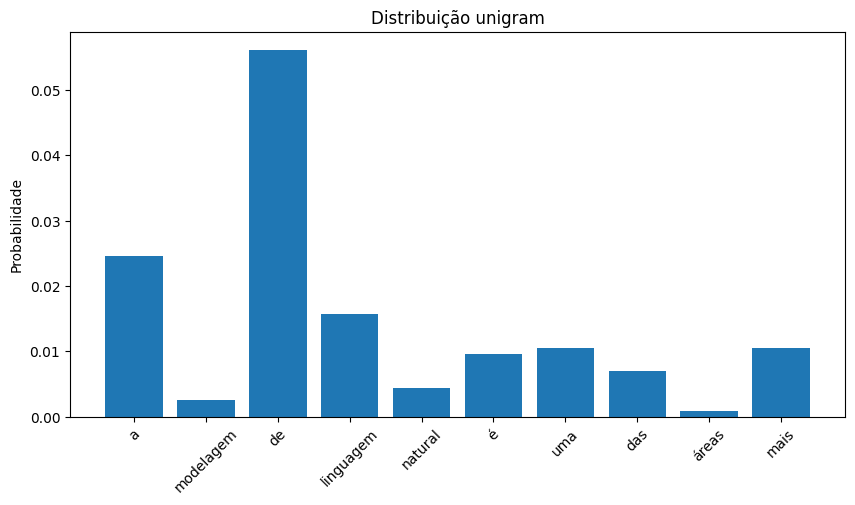

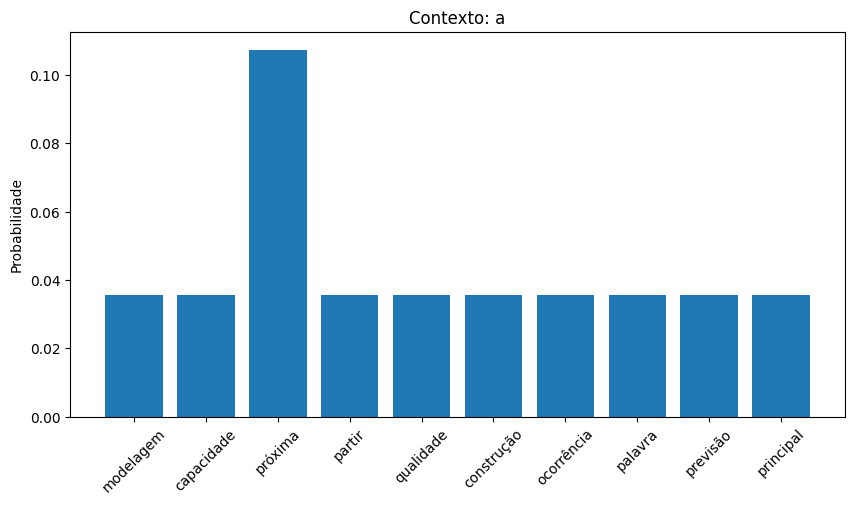

NameError: name 'modelo_3gram' is not defined

In [10]:
def mostrar_distribuicao(modelo, contexto=None):
    if modelo.n == 1:
        contexto = ()
    if contexto is None or contexto not in modelo.modelo:
        contexto = list(modelo.modelo.keys())[0]
    palavras = list(modelo.modelo[contexto].keys())
    probs = list(modelo.modelo[contexto].values())
    plt.figure(figsize=(10,5))
    plt.bar(palavras[:10], probs[:10])
    titulo = "Distribuição unigram" if modelo.n == 1 else f"Contexto: {' '.join(contexto)}"
    plt.title(titulo)
    plt.ylabel("Probabilidade")
    plt.xticks(rotation=45)
    plt.show()

mostrar_distribuicao(modelo_1gram)
mostrar_distribuicao(modelo_2gram)
mostrar_distribuicao(modelo_3gram)
mostrar_distribuicao(modelo_7gram, ("os", "modelos", "de", "linguagem", "são", "fundamentais"))


In [11]:
def distancia_edicao(s1, s2):
    if len(s1) < len(s2):
        return distancia_edicao(s2, s1)
    if len(s2) == 0:
        return len(s1)
    anterior = list(range(len(s2) + 1))
    for i, c1 in enumerate(s1):
        atual = [i + 1]
        for j, c2 in enumerate(s2):
            custos = [
                anterior[j + 1] + 1,
                atual[j] + 1,
                anterior[j] + (c1 != c2)
            ]
            atual.append(min(custos))
        anterior = atual
    return anterior[-1]

def sugerir_palavra(palavra, modelo):
    if palavra in modelo.modelo[()]:
        return palavra
    candidatos = []
    for voc in modelo.modelo[()]:
        dist = distancia_edicao(palavra, voc)
        if dist <= 2:
            prob = modelo.modelo[()].get(voc, 0)
            candidatos.append((voc, dist, prob))
    if not candidatos:
        return palavra
    candidatos.sort(key=lambda x: (x[1], -x[2]))
    return candidatos[0][0]

In [12]:
palavras_erradas = ["modelgem", "linguaem", "natual", "processment"]
print("Correções sugeridas:")
for erro in palavras_erradas:
    print(f"{erro} → {sugerir_palavra(erro, modelo_1gram)}")

Correções sugeridas:
modelgem → modelagem
linguaem → linguagem
natual → natural
processment → processamento


In [13]:
print("Textos gerados:")
print("Unigram:", modelo_1gram.gerar_texto([], 15))
print("Bigram:", modelo_2gram.gerar_texto(["linguagem"], 15))
print("Trigram:", modelo_3gram.gerar_texto(["modelos", "de"], 15))
print("setagram",modelo_7gram.gerar_texto(['a', 'modelagem', 'de', 'linguagem', 'natural', 'é', 'uma', 'das', 'áreas', 'mais'], 50))

Textos gerados:
Unigram: esses técnicas prever de assistentes das e que networks é linguagem ou ou modelos word
Bigram: linguagem natural além disso a ordem dos n grams enquanto os modelos baseados em diversos contextos


NameError: name 'modelo_3gram' is not defined